<a href="https://colab.research.google.com/github/mickeykubo/analytics_book/blob/master/scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第6章 科学技術計算モジュールSciPy
------------------

SciPy(<http://www.scipy.org/>): 科学技術計算のためのパッケージ

* optimize: 最適化と方程式の根
* spatial: 計算幾何
* stats: 確率・統計
* interpolate: 補間
* integrate: 積分
* linalg: 線形代数，cluster: クラスタリング，sparse: 疎行列

###  最適化
------

SciPyの最適化サブモジュールoptimize

非線形最適化ならびに非線形方程式の根を求めるための解法群

### optimizeに含まれる非線形最適化のための関数
### 1 変数用のminimize_scalar

### 例：関数 $f(x)= x/(1+x^2)$ の最小化
----

 $x=-1$ のとき最小値 $-1/2$ 

* グラフによる確認

* Brent法

* 黄金分割法

* 引数boundsで範囲を与えたBrent法


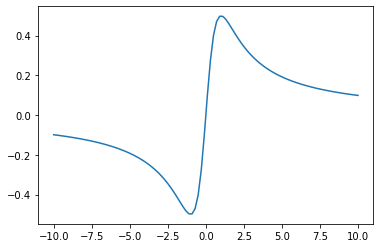

In [0]:
%matplotlib inline
from scipy.optimize import minimize_scalar
import numpy as np
from pylab import *
def f(x):
    return x/(1+x**2)

xx=np.linspace(-10,10,100)
yy=f(xx)
plot(xx,yy);None

In [0]:
print("Brent=========================")
print(minimize_scalar(f, method='Brent'))

print("Golden=========================")
print(minimize_scalar(f, method='Golden'))

print("Bounded=========================")
print(minimize_scalar(f, bounds=(-2,0), method='Bounded'))

Brent=========================
     fun: -0.5
    nfev: 10
     nit: 9
 success: True
       x: -0.99999999152478614
Golden=========================
     fun: -0.5
    nfev: 45
     nit: 39
 success: True
       x: -0.9999999904634918
Bounded=========================
     fun: -0.49999999999995526
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: -0.99999957691832075


### minimize(f,x0)
-----

複数の変数をもつ関数fを初期解x0からの探索で最小化

引数methodで探索のためのアルゴリズムを設定 

### 例： **Rosenbrock関数** 

$$f(x_1, x_2, \ldots, x_n) = \sum_{i=1}^{n-1} (100(x_i^2 - x_{i+1})^2 + (1-x_i)^2)$$

----
関数，Jacovian，Hessian

    sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

x=(1,1,...,1) のとき最小 

* 2次元の場合の描画

* 単体法(勾配情報なし）

* BFGS（準Newton法）（勾配情報のみ使う）

* 信頼領域Newton共役勾配法（勾配とHessian）


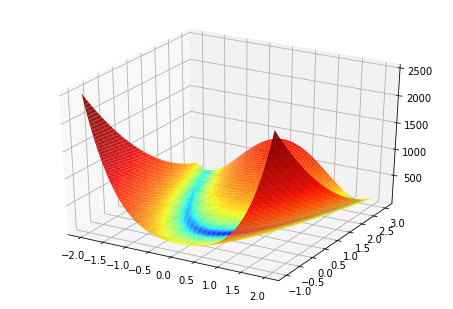

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
ax = Axes3D(figure())
s = .05
X = np.arange(-2, 2.+s, s) 
Y = np.arange(-1, 3.+s, s)
X, Y = np.meshgrid(X, Y)   
Z = (1.-X)**2 + 100.*(Y-X*X)**2 
ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1,  norm=LogNorm(), cmap=cm.jet, linewidth=0.2); None

In [0]:
#5次元の場合の比較

from scipy.optimize import minimize, rosen, rosen_der, rosen_hess

x0 = [2.0 for i in range(5)]
res = minimize(rosen, x0, method='Nelder-Mead')
print(res.x)

res = minimize(rosen, x0, jac=rosen_der, method='BFGS')
print(res.x)

res = minimize(rosen, x0, jac=rosen_der, hess=rosen_hess, method='trust-ncg')
print(res.x)

[ 1.00000047  1.00000079  1.0000027   1.00000292  1.00000473]
[ 0.99999999  0.99999998  0.99999995  0.99999992  0.99999985]
[ 1.          1.          1.          0.99999999  0.99999993]


## 制約付き最適化の例
----

半径 $\sqrt{2}$ の円内の制約の下で $x+y$ を最大化

* COBYLA (線形近似法;Constrained Optimization BY Linear Approximation）で求解

* SLSQP（逐次最小2乗法;Sequential Least SQuares Programming）で求解

In [0]:
def f(x):
    return -x[0]-x[1]
bnds = ((0, None), (0, None))
f = lambda x: -x[0]-x[1]
con  = {'type': 'ineq', 'fun': lambda x:  -x[0]**2 - x[1]**2 + 2 }
res = minimize(fun=f, x0=[2,2], method='COBYLA',constraints=con)
print("COBYLA========= \n",res)
res = minimize(fun=f, x0=[2,2], method='SLSQP',constraints=con)
print("SLSQP========== \n",res)

COBYLA========= 
      fun: -2.000000006134913
   maxcv: 2.0000961775679116e-08
 message: 'Optimization terminated successfully.'
    nfev: 47
  status: 1
 success: True
       x: array([ 1.00006218,  0.99993783])
SLSQP========== 
      fun: -2.000000092931198
     jac: array([-1., -1.])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 1.00000005,  1.00000005])


## 大域的最適化
-----

* basinhopping(f, x0): Basin-hopping法(焼き鈍し法ベースのメタヒューリスティクス)

  - 引数で局所探索の解法を指定：
  
   minimizer_kwargs={'method':'Nelder-Mead'}


* brute(f, ranges): 力ずく法
 
  - ranges: 変数ごとに下限と上限のタプルを入力
  

### 曲線へのあてはめ（最小2乗法）

* curve_fit(f,x,y): 配列  $x,y$ で与えたデータに対して誤差の最小2 乗和を最小にするような関数 $f$ のパラメータを求める

  返値：
  
 - 最小2 乗和を最小にするような推定パラメータを表す配列
 
 - 共分散行列を表す2 次元配列のタプル

### 例：  2 次関数 $a x^2+ bx+c$  へのあてはめ

In [0]:
from scipy.optimize import curve_fit
def f(x, a, b, c):
    return a*x**2 + b*x+ c
    
xdata = np.linspace(-10, 10, 20)
ydata = f(xdata, 1, 1, 1) + np.random.normal(size=len(xdata))
param, cov = curve_fit(f, xdata, ydata)
print( param )

[ 0.9983613   0.96478899  1.17484689]


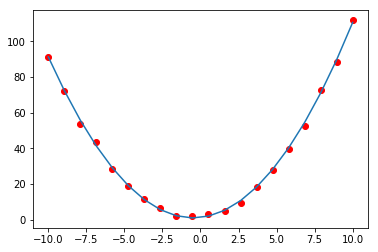

In [0]:
plot(xdata,ydata,"ro")
plot(xdata,f(xdata,param[0],param[1],param[2])); None

### 1 変数関数 $x^2 -4 \sin x$ の根

### $x=0$ だけでなく $x=1.9$ 付近でも根をもつ


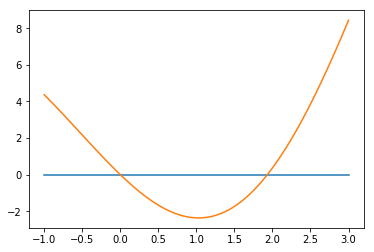

In [0]:
def f(x):
    return x**2 -4 * np.sin(x)

x = np.linspace(-1, 3, 100)    
plot(x,np.linspace(0, 0, 100) ) #x=0
y = f(x) 
plot(x,y); None

In [0]:
from scipy.optimize import root, brentq
print("Brentq=", brentq(f,1.0,3.0) )
print("Root finding ======\n ", root(f,2.0) )

Brentq= 1.9337537628270214
Root finding ======
      fjac: array([[-1.]])
     fun: array([ -4.44089210e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([ -1.96034300e-11])
       r: array([-5.28766996])
  status: 1
 success: True
       x: array([ 1.93375376])


# 計算幾何学
------

計算幾何とデータ構造に関するサブモジュール　spatial

主なクラス

 * K次元木 KDTree
 
 * 凸包 ConvexHull
 
 * Delaunay 3 角形分割 Delaunay
 
 * Voronoi図 Voronoi

 * 距離計算のためのサブモジュール distance

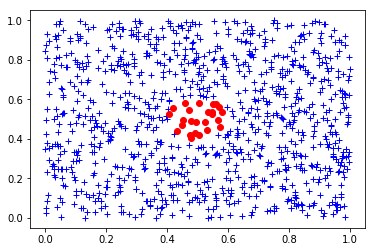

In [0]:
%matplotlib inline
from scipy.spatial import KDTree
import numpy as np
from pylab import *
points = np.random.rand(1000, 2)
tree = KDTree(points)
ball =  tree.query_ball_point([0.5, 0.5], 0.1)
plot(points[:,0], points[:,1], 'b+')
plot(points[ball,0], points[ball,1], 'ro'); None

### 凸包クラス ConvexHull

------

* 凸包：計算幾何学の基本となる概念；与えられたEuclid空間内の点を含む最小の凸多面体


[14 27  4 12 26 20  1 22]


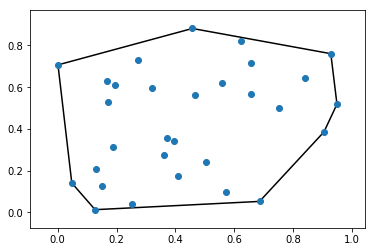

In [0]:
%matplotlib inline
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
points = np.random.rand(30, 2)   
hull = ConvexHull(points)
convex_hull_plot_2d(hull)
print( hull.vertices )

## Delaunay 3 角形分割クラス Delaunay

------
*  Delaunay3 角形分割: (2次元のときは）領域を点を通る3 角形に分割したとき，どの3角形の頂点を通る円も，他の点を含まない3 角形分割

*  近い点同士を見つけるのに便利；Voronoi図と双対の関係

*  応用事例：複数デポの大規模配送計画の前処理


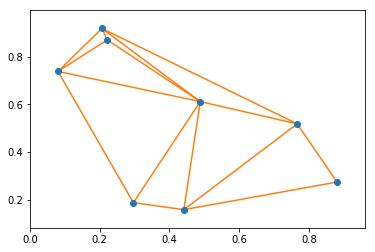

In [0]:
%matplotlib inline
from scipy.spatial import Delaunay,delaunay_plot_2d
import numpy as np
np.random.seed(5)
points = np.random.rand(8, 2)
tri = Delaunay(points,furthest_site=False)
fig = delaunay_plot_2d(tri)

## Voronoi図クラス Voronoi

------

*  Voronoi図: 各点に近い空間で領域分けされた図

* 点に近い領域を見つけるのに便利；Delaunay 3 角形分割の双対

* 与えられた点を母点，各母点に近い空間から成る領域をVoronoi領域． Voronoi領域の境界をVoronoi境界，Voronoi境界の交点をVoronoi点


[[ 0.5  0.5]
 [ 1.5  0.5]
 [ 0.5  1.5]
 [ 1.5  1.5]]


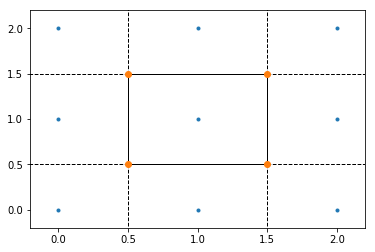

In [0]:
%matplotlib inline
from scipy.spatial import Voronoi,voronoi_plot_2d
import numpy as np
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1],
                   [1, 2], [2, 0], [2, 1], [2, 2]])
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
print( vor.vertices )

## 距離計算のためのサブモジュールdistance
----

*  euclidean(u,v): uとvの間のEuclid距離（直線距離）

 $\|u-v\|_2 = \left(\sum_{i} (u_i-v_i)^2 \right)^{1/2}$

*  chebyshev(u,v): uとvの間のChebyshev距離

 $(L_{\infty}$ ノルム)  $\max_{i} |u_i -v_i|$ 

* cityblock: uとvの間のManhattan距離（$L_{1}$ ノルム）

 $\sum_{i} |u_i-v_i|$ 

*  minkowski(u,v,p): uとvの間のMinkowski距離（(Minkowski p-ノルム）

 $\| u-v \|_p  =\left(\sum_{i} |u_i-v_i|^p \right)^{1/p}$



## 例題：最近点
* ### 2 次元Euclid平面上にランダムに分布した10000個の点に対する最も近い点を求める
* ### 最も近い点は，点を母点としたVoronoi図の隣接する領域の母点であることを利用
* ### $K$-d木と比較

In [0]:
from scipy.spatial import Voronoi, KDTree
from scipy.spatial.distance import euclidean
import numpy as np

def NN_KD(points):
    tree = KDTree(points)
    near={}
    total_cost=0.0
    for i,p in enumerate(points):
        dis,near_list=tree.query(p,k=2)
        near[i]=near_list[1]      

def NN_Voronoi(points):
    vor = Voronoi(points)
    dis, near ={},{}
    for i in range(len(points)):
        dis[i]=np.inf
    for (i,j) in vor.ridge_points:
        d = euclidean(points[i],points[j])
        if d<dis[i]:
            dis[i]=d
            near[i]=j
        if d<dis[j]:
            dis[j]=d
            near[j]=i

n = 1000
points = np.random.rand(n, 2)
%time NN_KD(points)
%time NN_Voronoi(points)

Wall time: 144 ms
Wall time: 55.1 ms


## 例題：Euclid最小木問題
----
* ### 点間の距離はEuclid距離

* ### Euclid最小木問題の最適解に含まれる枝は，必ずVoronoi図の隣接する領域間の母点対の枝集合に含まれる

* ### Voronoi図の隣接する領域間の母点対は ridge_points を用いて列挙




Wall time: 283 ms
Wall time: 19 ms


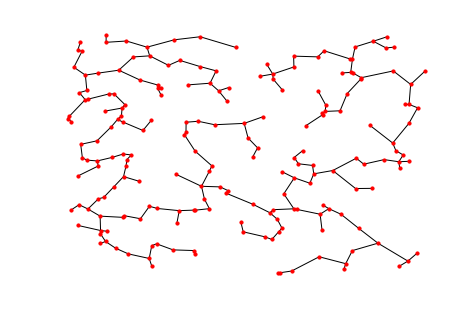

In [0]:
%matplotlib inline
from scipy.spatial import Voronoi
from scipy.spatial.distance import euclidean
import networkx as nx
import numpy as np

def MST(points):
    G=nx.Graph()
    for i,p in enumerate(points):
        for j,q in enumerate(points):
            if i<j:
                G.add_edge(i,j,weight=euclidean(p,q))            
    E = nx.minimum_spanning_edges(G)

def MST_Voronoi(points):
    G=nx.Graph()
    vor = Voronoi(points)
    for (i,j) in vor.ridge_points:
        G.add_edge(i,j,weight=euclidean(points[i],points[j])) 
    E = nx.minimum_spanning_edges(G)
    return G, E
    
n = 200
points = np.random.rand(n, 2)

%time MST(points)
%time MST_Voronoi(points)

G,E=MST_Voronoi(points)
pos={i: (points[i][0],points[i][1])   for i in range(n)}
nx.draw(G, pos=pos, node_size=10, edgelist=list(E))

# 確率・統計
------

確率・統計に関するサブモジュール　stats

* 確率分布の基礎
* 共通のメソッド
* 連続確率変数
* 離散確率変数
* データのあてはめ
* 相関と回帰
* 分布テスト



In [1]:
from scipy.stats import norm
print( norm(loc=100,scale=10).stats(moments='mvsk') )

(array(100.), array(100.), array(0.), array(0.))


### 分布の**固定化**(freezing)
* パラメータを固定した正規分布インスタンス n を生成
* 固定化して分布 n に対して，分布関数メソッドcdfと密度関数メソッドpdfを用いる 

In [2]:
n = norm(loc=100,scale=10)
print( n.cdf(80), n.pdf(80))

0.022750131948179195 0.005399096651318806


In [8]:
#スライダーで平均と標準偏差を入力するウィジットを追加
from ipywidgets import interact
import numpy as np
from matplotlib.pyplot import plot
def f(a, b):
    g = norm(loc=a,scale=b)
    x = np.linspace(-100, 100, 100)
    y = g.pdf(x)
    plot(x,y);

interact(f, a=(-50,50,1), b=(1,100,1))

interactive(children=(IntSlider(value=0, description='a', max=50, min=-50), IntSlider(value=50, description='b…

<function __main__.f>

### ガンマ分布(形状パラメータの使用例）

正のパラメータ $\lambda ,a$ て定義される分布

平均は $a/\lambda$，分散は $a/\lambda^2$ 

   - **形状** (shape)パラメータ a （分布によって名前は異なる；形状パラメータは必ず第1引数なので，名前を省略）
   - 尺度パラメータ scale（$1/\lambda$ に対応）
   
例：ガンマ分布を生成して，平均と分散を計算

In [0]:
from scipy.stats import gamma
g = gamma(1,scale=10)             #a=1 (shape). 1/gamma=10 (scale)
print( g.stats(moments='mv') )    #mean =a/gamma, variance =1/gamma^2

(array(10.0), array(100.0))


## 共通メソッド
-----------

#### rvs: 確率変数にしたがう擬似乱数を生成するメソッド
   * 引数size: 生成する乱数の数（タプルを引数としたときは配列）


In [0]:
from scipy.stats import norm
n = norm(loc=100,scale=10)
print('array=', n.rvs(size=5) )
print('matrix=', n.rvs(size=(2,3)) )

array= [ 108.73225712  108.45128881  113.66825351   89.11537976  108.10635549]
matrix= [[  89.73824322  100.0276385   128.04029594]
 [ 123.51596258   92.09541691  104.73862244]]


In [0]:
from ipywidgets import interact
def f(a, b):
    g = norm(loc=a,scale=b)
    x = np.linspace(-100, 100, 100)
    y = g.pdf(x)
    plot(x,y);

interact(f, a=(-50,50,1), b=(1,100,1))

interactive(children=(IntSlider(value=0, description='a', max=50, min=-50), IntSlider(value=50, description='b…

<function __main__.f(a, b)>

(array(0.5772156649015329), array(1.6449340668482264), array(1.1395470994046486), array(2.4))


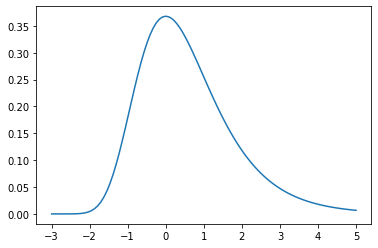

In [0]:
%matplotlib inline
from pylab import *
from scipy.stats import gumbel_r
g = gumbel_r(loc=0,scale=1)
print( g.stats(moments='mvsk') )

x = np.linspace(-3, 5, 100)
y = g.pdf(x)
plot(x,y); None

In [0]:
from scipy.stats import mode
print(g.mean(),g.median())

0.577215664902 0.366512920582


### ppf: **パーセント点関数**(percent point function) （分布関数の逆関数）

  - 例：平均 100，標準偏差 10 の正規分布にしたがう需要をもつ商品に対して品切れ率を 5% にするための在庫量

    `from scipy.stats import norm
    print( norm.ppf(0.95,loc=100,scale=10) )`
    > 116.44853627




### sf: **生存関数**(survival function) （$1-F(x)$）

 - 例: 平均 100，標準偏差 10 の正規分布にしたがう需要をもつ商品に対して，123 個仕入れたときの品切れ確率

    `from scipy.stats import norm
    print( norm.sf(123,loc=100,scale=10) )`
    > 0.0107241100217

### expect(func) : 引数として与えられた関数funcの分布に対する期待値

In [0]:
from scipy.stats import norm
def f(x):
    if x>113:
        return 100*(x-113)
    elif x<113:
        return 10*(113-x)
    
print( norm.expect(f, loc=100, scale=10) )

180.08075830731676


### 多変量正規分布
* 平均を表す多次元ベクトル $\mu$ 
* 共分散行列を表す尺度パラメータ $\Sigma$ 

$$
f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}}
       \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
$$


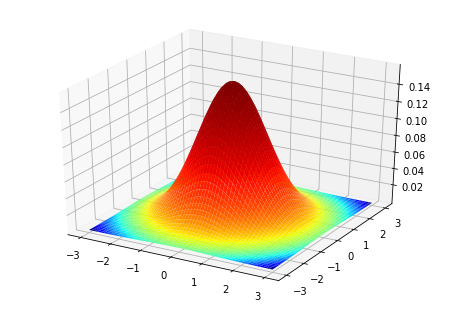

In [0]:
%matplotlib inline
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from scipy.stats import multivariate_normal
ax = Axes3D(figure())
s = .1
X = np.arange(-3, 3.+s, s) 
Y = np.arange(-3, 3.+s, s)

X, Y = np.meshgrid(X, Y)   
pos = np.dstack((X, Y))

#n = multivariate_normal([0.0, 0.0], [[1.0, -0.8], [-0.8, 1.0]])
n = multivariate_normal([0.0, 0.0])
Z =n.pdf(pos)  
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,  
                norm=LogNorm(), cmap=cm.jet, linewidth=0.2); None
#savefig("multivariate",dpi=600)

In [0]:
print(n.rvs(3))
print(n.pdf([0.0,0.0]))

[[ 1.4459175  -0.88131263]
 [-0.67338593 -1.49557129]
 [-0.12533674 -0.09419818]]
0.159154943092


## データのあてはめ
---

* ### fit(data): 与えられたデータdataに対するパラメータの**最尤推定値**
  - 返値; 形状パラメータshape，位置パラメータloc，尺度パラメータscaleのタプル

* 例: 平均 100，標準偏差 10 の正規分布に対する，10 個のランダムサンプルと 10000 個のランダムサンプルの比較

    `from scipy.stats import norm
    rvs = norm(loc=100,scale=10).rvs(size=10)
    print( norm.fit(rvs) )`
    > (95.753904782189622, 8.3575610605102142)

    `rvs = norm(loc=100,scale=10).rvs(size=10000)
    print( norm.fit(rvs) )`
    > (99.948939025624099, 9.908908275994496
    

* ### 平均や標準偏差を固定して推定（引数 floc, fscaleで指定）

    `rvs = norm(loc=100,scale=10).rvs(size=10000)
    print( norm.fit(rvs, floc=100) )`
    > (100.0, 9.9532121919298557)  
    
* ガンマ分布のように形状パラメータを必要とする場合には，引数名は`f0`, `f1`, ... と番号で指定

    `from scipy.stats import gamma
    rvs = gamma(1,scale=10).rvs(size=10000)
    print( gamma.fit(rvs) )`
    > (0.9890002824686166, 0.0016179707988114146, 10.186757557396639)

    `rvs = gamma(1,scale=10).rvs(size=10000)
    print( gamma.fit(rvs, f0=1) )`
    > (1.0, 0.001617970100331767, 10.013201292197056)

## 分布テスト
-----

### 例: 正規分布にしたがってランダムに発生させたデータに対する確率プロット

(10.019842168865456, 99.956293279718381, 0.99993003197720121)


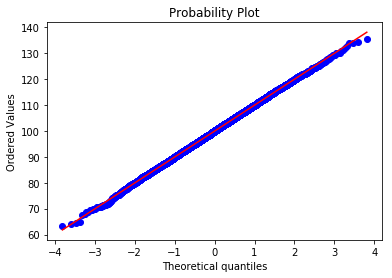

In [0]:
from scipy.stats import norm, probplot
import matplotlib.pyplot as plt
rvs = norm(loc=100,scale=10).rvs(size=10000)
xy_pair, corr = probplot(rvs, plot=plt)
print( corr )

### 補間
-----

### 例：1 次元の補間 $f(x)=\sin x/(1+x^2)$


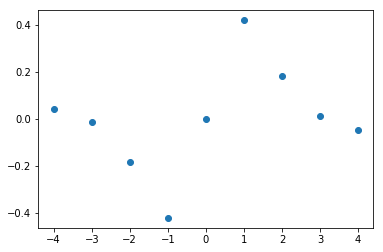

In [0]:
%matplotlib inline
from pylab import *
import numpy as np
from scipy import interpolate
x = np.arange(-4,5)
y = np.sin(x)/(1+x**2)
plot(x, y, 'o'); None

            8             7             6           5             4
-1.249e-19 x - 0.0006892 x - 6.583e-18 x + 0.02123 x + 5.436e-17 x
           3             2
 - 0.2016 x + 1.415e-17 x + 0.6018 x


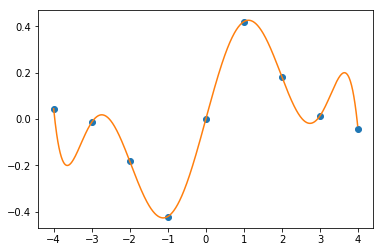

In [0]:
f = interpolate.lagrange(x, y)
print(f)
xnew = np.arange(-4,4, 0.01)
ynew = f(xnew)  
plot(x, y, 'o', xnew, ynew, '-') ; None

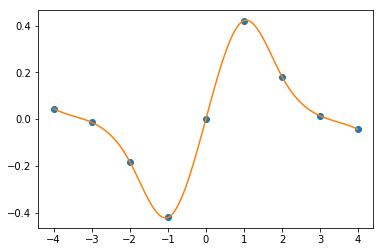

In [0]:
#f = interpolate.interp1d(x, y, kind= 'linear')
#f = interpolate.interp1d(x, y, kind= 'nearest')
#f = interpolate.interp1d(x, y, kind= 'zero')
#f = interpolate.interp1d(x, y, kind= 'slinear')
#f = interpolate.interp1d(x, y, kind= 'quadratic')
f  = interpolate.interp1d(x, y, kind= 'cubic')
xnew = np.arange(-4,4, 0.01)
ynew = f(xnew)   
plot(x, y, 'o', xnew, ynew, '-'); None

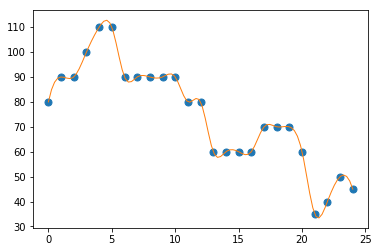

In [0]:
#テーマパークの待ち時間の補間
y = np.array([80,90,90,100,110,110,90,90,90,90,90,80,
              80,60,60,60,60,70,70,70,60,35,40,50,45])
x=np.arange(0,len(y))
f  = interpolate.interp1d(x, y, kind= 'cubic')
xnew = np.linspace(0,len(y)-1,100)
ynew = f(xnew)  
plot(x, y, 'o', xnew, ynew, '-', lw=1,ms=7); None

### 積分
----

 例１：テーマパークの待ち時間の平均値


In [0]:
from scipy import integrate
(total,error) =  integrate.quad(f, 0,len(y)-1,limit=1000)
print(total/len(y))

72.4373621070184


例２：円錐の面積

In [0]:
f = lambda x: 2*math.pi*x**2
print( integrate.quad(f, 0, 1./math.sqrt(math.pi)) )
print( 2./3./math.sqrt(math.pi) )

(0.37612638903183754, 4.175841772722649e-15)
0.37612638903183754


例３：面積 1 の正方形の都市に一様に住んでいる人の，正方形の中心にあるスーパーに行くときの距離の期待値（理論値の導出は結構面倒；拙著「はじめての確率論」（近代科学社）参照）

In [0]:
f=lambda x,y: math.sqrt( (x-0.5)**2 +(y-0.5)**2 )
g=lambda x: 0.0
h=lambda x: 1.0
print(integrate.dblquad(f,0,1,g,h))                #2重積分
print((math.sqrt(2)+math.log(1+math.sqrt(2)))/6.0) #理論値

(0.3825978582314068, 1.3339283230929342e-08)
0.38259785823210635


## 線形代数

In [0]:
import numpy as np
import scipy.linalg as linalg
A = np.array([[1,-1,-1],[-1,1,-1],[-1,-1,1]])
print(linalg.inv(A))
print(np.dot(A,linalg.inv(A)))

[[ 0.  -0.5 -0.5]
 [-0.5 -0.  -0.5]
 [-0.5 -0.5  0. ]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [0]:
if False:
    B = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
    print(linalg.inv(B)) #エラーする例
    print(np.dot(B,linalg.inv(B)))

In [0]:
A = np.array([[1,3,-2],[2,2,-1],[3,-1,1]])
b = np.array([-2,1,5])

print(linalg.solve(A,b))
print(np.dot(linalg.inv(A),b)) # A^-1 bの計算

[ 1.  1.  3.]
[ 1.  1.  3.]


In [0]:
A = np.array([[1,3,-2],[2,2,-1],[3,-1,1]])
b = np.identity(3)

x = linalg.solve(A,b)
print(x)
print(np.dot(A,x))

[[ 0.5 -0.5  0.5]
 [-2.5  3.5 -1.5]
 [-4.   5.  -2. ]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [0]:
#数値的に不安定な例
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([-2,1,5])

if False:
    print(linalg.inv(A)) # エラー
    print(linalg.solve(A,b)) # エラー
print(linalg.det(A))

0.0


In [0]:
L = np.arange(5.0)
a = np.array([L[j]-L[i] for i in range(len(L)) for j in range(len(L)) if j>i])
print( a.prod() )

A = np.vander(L)
print(np.linalg.det(A))

288.0
288.0


In [0]:
x = np.array([0,0])
y = np.array([3,4])
A = np.arange(9).reshape(3,3)

print('Euclid-norm(x-y):',linalg.norm(x-y))
print('1-norm(x-y):',linalg.norm(x-y,1))
print('inf-norm(x-y):',linalg.norm(x-y,np.inf))
print('2-norm(A):',linalg.norm(A,2))
print('1-norm(A):',linalg.norm(A,1))
print('inf-norm(A):',linalg.norm(A,np.inf))
print('fro-norm(A):',linalg.norm(A,'fro'))
print('root(trace(A*A)):',np.sqrt(np.trace(np.dot(A.T,A))))

Euclid-norm(x-y): 5.0
1-norm(x-y): 7.0
inf-norm(x-y): 4.0
2-norm(A): 14.2267073908
1-norm(A): 15.0
inf-norm(A): 21.0
fro-norm(A): 14.2828568571
root(trace(A*A)): 14.2828568571


In [0]:
A = np.array([[1,1,1],[1,2,3],[1,4,9]])
(v,X) = linalg.eig(A)
print(v)
print(X)
V = np.diag(v)
B = np.dot(X,np.dot(V,linalg.inv(X)))
print(B)

[ 10.60311024+0.j   1.24543789+0.j   0.15145187+0.j]
[[-0.132363   -0.72999807  0.57300039]
 [-0.34005127 -0.56448038 -0.76916357]
 [-0.9310452   0.38531119  0.28294516]]
[[ 1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  2.+0.j  3.+0.j]
 [ 1.+0.j  4.+0.j  9.+0.j]]


In [0]:
A = np.array([[1,2,3],[4,5,6]])
print('A=',A)
m,n = A.shape
U, s, Vs = linalg.svd(A)
S = linalg.diagsvd(s,m,n)
print('U=',U); 
print('S=',S)
print('V*=',Vs)
print('U . S. V*=\n', U @ S @ Vs)

A= [[1 2 3]
 [4 5 6]]
U= [[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]
S= [[ 9.508032    0.          0.        ]
 [ 0.          0.77286964  0.        ]]
V*= [[-0.42866713 -0.56630692 -0.7039467 ]
 [ 0.80596391  0.11238241 -0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]
U . S. V*=
 [[ 1.  2.  3.]
 [ 4.  5.  6.]]


In [0]:
A = np.identity(5)
A[0,:] = 1; A[:,0] = 1; A[0,0] = 5;
b = np.ones(5)
print(A)
(LU,piv) = linalg.lu_factor(A)
print((LU,piv))
L = np.identity(5)+np.tril(LU,-1)
U = np.triu(LU)
P = np.identity(5)[piv]
print(np.dot(np.dot(P,L),U))
x = linalg.lu_solve((LU,piv),b)
print(x)

[[ 5.  1.  1.  1.  1.]
 [ 1.  1.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.]
 [ 1.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  1.]]
(array([[ 5.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.2       ,  0.8       , -0.2       , -0.2       , -0.2       ],
       [ 0.2       , -0.25      ,  0.75      , -0.25      , -0.25      ],
       [ 0.2       , -0.25      , -0.33333333,  0.66666667, -0.33333333],
       [ 0.2       , -0.25      , -0.33333333, -0.5       ,  0.5       ]]), array([0, 1, 2, 3, 4], dtype=int32))
[[  5.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   1.38777878e-17   1.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   1.38777878e-17   0.00000000e+00
    1.00000000e+00]]
[-3.  4.  4.  4.  4.]


In [0]:
A = np.array([[2,1],[1,3]])
U = linalg.cholesky(A)
print(U)
print(np.dot(U.T,U))
B = np.array([[2,1+1j],[1-1j,3]])
L = linalg.cholesky(B,lower=True)
print(L)
print(np.dot(L, np.conj(L).T))

[[ 1.41421356  0.70710678]
 [ 0.          1.58113883]]
[[ 2.  1.]
 [ 1.  3.]]
[[ 1.41421356+0.j          0.00000000+0.j        ]
 [ 0.70710678-0.70710678j  1.41421356+0.j        ]]
[[ 2.+0.j  1.+1.j]
 [ 1.-1.j  3.+0.j]]


In [0]:
A = np.array([[1,2,3],[4,5,6]])
print('A=',A)
Q, R = linalg.qr(A)
print('Q=\n',Q)
print('R=\n',R)
print('Q.R =\n', Q @ R)
print('Q.Q*=\n', Q @ np.conj(Q).T)

A= [[1 2 3]
 [4 5 6]]
Q=
 [[-0.24253563 -0.9701425 ]
 [-0.9701425   0.24253563]]
R=
 [[-4.12310563 -5.33578375 -6.54846188]
 [ 0.         -0.72760688 -1.45521375]]
Q.R =
 [[ 1.  2.  3.]
 [ 4.  5.  6.]]
Q.Q*=
 [[  1.00000000e+00   1.94289029e-16]
 [  1.94289029e-16   1.00000000e+00]]


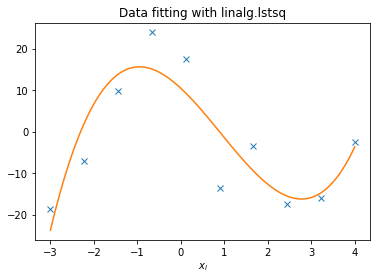

In [0]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

np.random.seed(0)
a3, a2, a1, a0 = 1.0, -3.0, -6.0, 2.0
xi = np.linspace(-3,4,10)
yi = a3*xi**3 + a2*xi**2 + a1*xi + a0
zi = yi +2.0*np.max(yi)*np.random.randn(len(yi))
A = np.vander(xi,4)
c, resid, rank, sigma = linalg.lstsq(A,zi)

xi2 = np.linspace(-3,4,100)
yi2 = c[0]*xi2**3 + c[1]*xi2**2 + c[2]*xi2 + c[3]

plt.plot(xi,zi,'x',xi2,yi2)
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

In [0]:
A = np.array([[1,1,2],[1,3,-1],[0,1,1]])
OA = linalg.orth(A)
U, S, V = linalg.svd(A)

print('A= ',A)
print('orth(A):', OA)
print('orth(A).T dot A \n',np.dot(OA.T,OA))
print('U: ',U)

A=  [[ 1  1  2]
 [ 1  3 -1]
 [ 0  1  1]]
orth(A): [[-0.39543728  0.80500544 -0.44226191]
 [-0.87521453 -0.47631006 -0.08442901]
 [-0.27861961  0.35368767  0.89290321]]
orth(A).T dot A 
 [[  1.00000000e+00   2.29535095e-16  -3.47750653e-16]
 [  2.29535095e-16   1.00000000e+00   1.02157332e-16]
 [ -3.47750653e-16   1.02157332e-16   1.00000000e+00]]
U:  [[-0.39543728  0.80500544 -0.44226191]
 [-0.87521453 -0.47631006 -0.08442901]
 [-0.27861961  0.35368767  0.89290321]]


In [0]:
from scipy import sparse
row = np.array([0,1,1,1,2,3,3])
col = np.array([2,0,1,2,2,1,3])
data = np.array([2j, 1, 1+1j,1+2j, 2+2j,3+1j,3+3j])
COO = sparse.coo_matrix((data,(row,col)))
print(COO)
print(COO.toarray())

  (0, 2)	2j
  (1, 0)	(1+0j)
  (1, 1)	(1+1j)
  (1, 2)	(1+2j)
  (2, 2)	(2+2j)
  (3, 1)	(3+1j)
  (3, 3)	(3+3j)
[[ 0.+0.j  0.+0.j  0.+2.j  0.+0.j]
 [ 1.+0.j  1.+1.j  1.+2.j  0.+0.j]
 [ 0.+0.j  0.+0.j  2.+2.j  0.+0.j]
 [ 0.+0.j  3.+1.j  0.+0.j  3.+3.j]]


In [0]:
N = 3000
m = sparse.rand(N, N,density=0.01)

COO = m.copy()
LIL = m.tolil()
CSC = m.tocsc()
CSR = m.tocsr()
AR = m.toarray()
print(COO.nonzero)

print('The sparse matrix: COO data size: ' + str(COO.data.nbytes/1000) + ' kbytes')
print('The sparse matrix: LIL data size: ' + str(LIL.data.nbytes/1000) + '  kbytes')
print('The sparse matrix: CSC data size: ' + str(CSC.data.nbytes/1000) + ' kbytes')
print('The sparse matrix: CSR data size: ' + str(CSR.data.nbytes/1000) + ' kbytes')
print('The numpy array: AR data size: ' + str(AR.nbytes/1000) + ' kbytes')

<bound method spmatrix.nonzero of <3000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 90000 stored elements in COOrdinate format>>
The sparse matrix: COO data size: 720.0 kbytes
The sparse matrix: LIL data size: 24.0  kbytes
The sparse matrix: CSC data size: 720.0 kbytes
The sparse matrix: CSR data size: 720.0 kbytes
The numpy array: AR data size: 72000.0 kbytes


In [0]:
import numpy as np
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
from scipy.linalg import solve

#N = 5000
N = 1000
m1 = sparse.rand(N, N, density=0.01)
m2 = sparse.rand(N, N, density=0.01)

LIL1 = m1.tolil(); LIL2 = m2.tolil();
CSC1 = m1.tocsc(); CSC2 = m2.tocsc();
CSR1 = m1.tocsr(); CSR2 = m2.tocsr();
AR1 = m1.toarray(); AR2 = m2.toarray();

print('和の計算時間')
%timeit LIL1+LIL2
%timeit CSC1+ CSC2
%timeit CSR1+ CSR2
%timeit -n 100 AR1+ AR2
print('積の計算時間')
%timeit LIL1.dot(LIL2)
%timeit -n 100 CSC1.dot(CSC2)
%timeit -n 100 CSR1.dot(CSR2)
%timeit -n 3 AR1.dot(AR2)

和の計算時間
2.21 ms ± 181 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
221 µs ± 8.99 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
206 µs ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.79 ms ± 485 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
積の計算時間
3.84 ms ± 570 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.16 ms ± 172 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
803 µs ± 32.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.9 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [0]:
m = sparse.rand(N, N, density=0.01)
b = sparse.rand(N, 1, density=0.01)

print('方程式を解く計算時間')
CSC = m.tocsc(); bcsc = b.tocsc();
CSR = m.tocsr(); bcsr = b.tocsr();
AR = m.toarray(); bar = b.toarray().reshape(-1)

%timeit spsolve(CSC,bcsc)
%timeit spsolve(CSR,bcsr)
%timeit solve(AR,bar)

方程式を解く計算時間
94 ms ± 4.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
98 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
37.7 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
